In [1]:
using Distributed
addprocs(44);

In [2]:
using pulse_input_DDM, Flatten

In [3]:
θ_generative = θchoice(θz=θz(σ2_i = 5., B = 8., λ = -1., σ2_a = 20., σ2_s = 0.5,
    ϕ = 0.8, τ_ϕ = 0.05), bias=2., lapse=0.05);

In [4]:
x_generative = collect(Flatten.flatten(θ_generative));

In [5]:
n = 53

53

In [6]:
_, data_20K = synthetic_data(n ;θ=θ_generative, ntrials=20_000, rng=1, dt=1e-2);

## Plot

In [7]:
@everywhere ℓℓ(x, n, data) = -pulse_input_DDM.loglikelihood(x, data; n=n)

In [8]:
αs = [range(0.5,stop=8,length=30),
    range(5,stop=20,length=30),
    range(-2,stop=2.,length=30),
    range(2,stop=100,length=30),
    range(0.1,stop=2.,length=30),
    range(0.4,stop=1.1,length=30),
    range(0.005,stop=0.1,length=30),
    range(-1.,stop=3,length=30),
    range(0.0,stop=0.15,length=30)];

In [9]:
LL_scan = map(i-> map(x-> ℓℓ(vcat(x_generative[1:i-1], x, x_generative[i+1:end]), n, data_20K), αs[i]), 1:9);

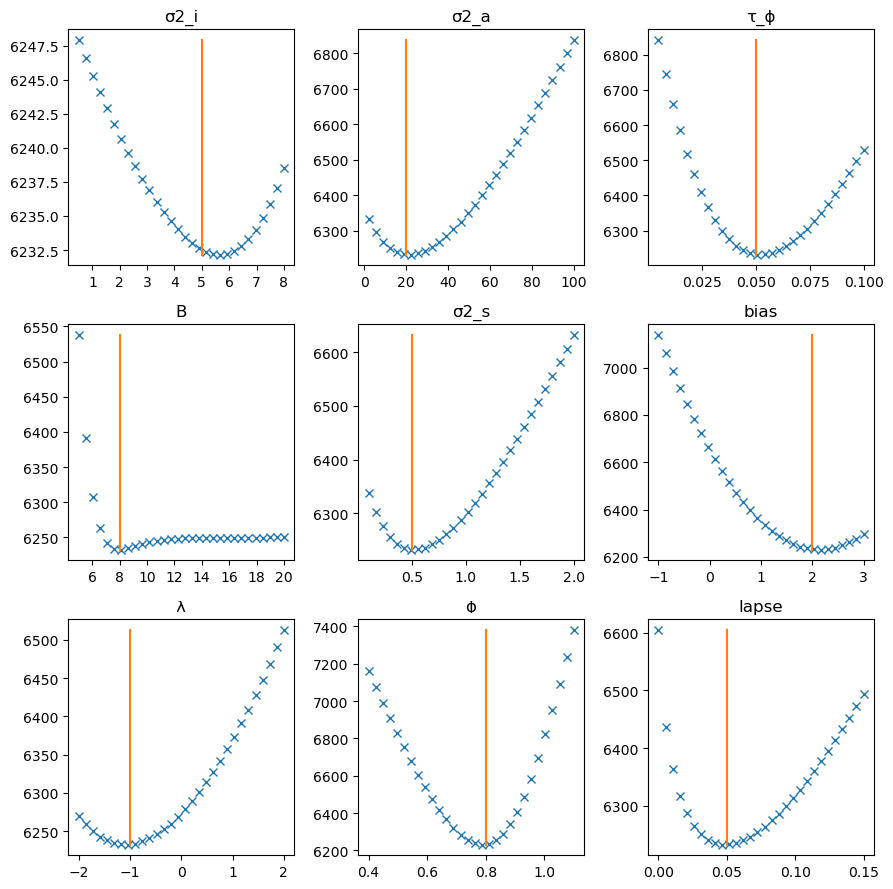

In [10]:
using PyPlot

num_rows, num_cols = 3,3
fig, ax = subplots(num_rows, num_cols, figsize=(9,9))
name = ["σ2_i", "B", "λ", "σ2_a", "σ2_s", "ϕ", "τ_ϕ", "bias", "lapse"]

for i in 1:9
                  
    ax[i].plot(αs[i], LL_scan[i], "x")
    ax[i].set_title(name[i])
    ax[i].plot(x_generative[i]*ones(100), range(minimum(LL_scan[i]), stop=maximum(LL_scan[i]), length=100))
    
    if i == 4
        ax[i].set_xticks(0:20:100)
    elseif i == 1
        ax[i].set_xticks(1:1:8)
    elseif i == 2
        ax[i].set_xticks(6:2:20)
    elseif i == 5
        ax[i].set_xticks(0.5:0.5:2)
    end
    
end

tight_layout() 

## Simulate data, instead of using FP

In [11]:
_, data_20K_simulate = synthetic_data(;θ=θ_generative, ntrials=20_000, rng=1, dt=1e-2);

In [12]:
LL_scan_simulate = map(i-> map(x-> ℓℓ(vcat(x_generative[1:i-1], x, x_generative[i+1:end]), n, data_20K_simulate), αs[i]), 1:9);

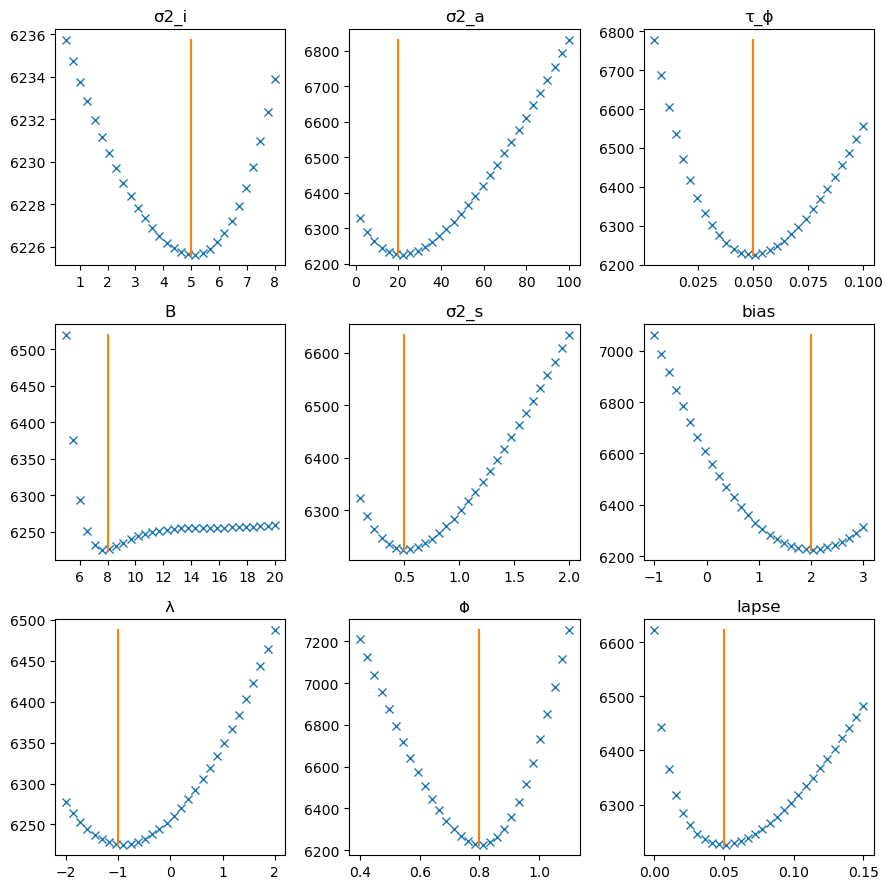

In [13]:
using PyPlot

num_rows, num_cols = 3,3
fig, ax = subplots(num_rows, num_cols, figsize=(9,9))
name = ["σ2_i", "B", "λ", "σ2_a", "σ2_s", "ϕ", "τ_ϕ", "bias", "lapse"]

for i in 1:9
                  
    ax[i].plot(αs[i], LL_scan_simulate[i], "x")
    ax[i].set_title(name[i])
    ax[i].plot(x_generative[i]*ones(100), range(minimum(LL_scan_simulate[i]), stop=maximum(LL_scan_simulate[i]), length=100))
    
    if i == 4
        ax[i].set_xticks(0:20:100)
    elseif i == 1
        ax[i].set_xticks(1:1:8)
    elseif i == 2
        ax[i].set_xticks(6:2:20)
    elseif i == 5
        ax[i].set_xticks(0.5:0.5:2)
    end
    
end

tight_layout() 